# Laporan Proyek Machine Learning - Handerson Loriano

In [41]:
# Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
import matplotlib.ticker as mtick

## Domain proyek
Pendahuluan yang mendasarkan dari kutipan [<sup>[1]</sup>](https://www.kaggle.com/datasets/farjanakabirsamanta/skin-cancer-dataset) [<sup>[2]</sup>](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T) [<sup>[3]</sup>](https://www.nature.com/articles/sdata2018161#Sec1)</br>
</br>
*Dermatoscopic* banyak digunakan oleh pengguna tanpa memakai alat bantuan lihat lain karena gambar dari *dermatoscopic* sesuai untuk pelatihan *AI* untuk mendiagnosa keadaan kulit. Karena *Training dataset* untuk *machine learning* karena beberapa ukuran gambar data sampel kecil dan cenderung tidak terlalu beragam dari gambar *dermatoscopic*.</br>

Dikutip dari [Wikipedia](https://en.wikipedia.org/wiki/Dermatoscopy) </br>
*Dermatoscopic* adalah pemeriksaan lesi kulit memakai *dermatoscope*. Alat ini sangat mirip dengan kamera untuk memeriksa lesi kulit tanpa ada halangi disekitarnya. *Dermatoscope* ini terdiri dari :
1. lensa kaca pembesar
2. cahaya polarisasi dan biasa
3. plat transparansi dan beberap gel menjadi medium diantara alatnya dan kulit pasien

### Rumusan permasalahan awal
- permasalahan karena alat dermatoscope adalah alat yang mempunyai biaya yang cukup besar sehingga ini menjadi pertimbangan untuk para ahli menggunakan alatnya. </br>
- Tidak mudah bagi manusia yang ahli mendiagnosa kulit dari kasat mata karena, alat *dermatoscopy* membutuhkan penilaian dan pertimbangan dari mata manusia sehingga ini menjadi hal yang perlu diselesaikan. Untungnya beberapa gambar dari alat *dermatoscopy* sangat sesuai untuk *machine learning*
- karena manusia lebih mudah melihat dari angka dan data visualisasi yang tepat dibanding gambaran maka, alat ini adalah sebagai alat penunjang untuk memastikan kondisi kulit tersebut. </br>
- Sampel data yang tidak terlalu banyak dapat menyebabkan hasil analisa *AI* yang tidak sesuai karenanya, dimunculkan data-data pasien dari populasi yang berbeda-beda

Seiring perkembangan jaman proses *machine learning* dan alat seperti *graphic card* semakin canggih. Maka hal ini bisa menyelesaikan data2 yang tadinya sangat banyak menjadi lebih ringkas dan bisa divisualisasikan oleh manusia supaya mendapat laporan lesi kulit yang lebih baik.</br>
Dengan adanya hal tersebut :
1. Mempermudah dan dapat berpotensi mempersingkat waktu dalam analisa penyakit lesi kulit pengecekan analisis pada penyakit lesi kulit
2. Pengecekan yang memakan waktu sedikit akan berpotensi mengurangi biaya yang besar seperti alatnya *dermatoscope*</br>

### *Background*
Sangat tidak mudah untuk mendeteksi dini tentang kesehatan kulit :
1. Dari biaya yang lumayan mahal hanya untuk mendeteksi beberapa jenis kulit
2. Dari sekian kulit memang belum tentu membahayakan seseorang ini tidak sebanding dengan biaya mahal hanya untuk mendeteksi dan bahayanya lesi kulit yang lebih ganas. Maka dari hal itu diperlukan ada alat deteksi otomatis
3. Ada artikel tentang penyakit kulit ganas dari [ini](https://www.foxnews.com/health/olympic-swimmer-potentially-saved-from-skin-cancer-thanks-to-eagle-eyed-fan). </br>
([Catatan](https://www.worldlifeexpectancy.com/id/indonesia-skin-disease) Karena, sumber data dari WHO tidak bisa dilihat secara langsung, maka pengambilan data mentah berasal dari sumber website yang bukan dari sumber data WHO)</br>
walaupun tidak mematikan tetapi, ini bisa menjadikan perhatian bahwa penyakit lesi kulit itu bukan hal yang remeh-temeh.

## Business Understanding
### Problem Statements
1. Apakah usia mempengaruhi seseorang terkena penyakit kulit?
2. Bagaimana cara membedakan penyakit kulit dengan beberapa fitur yang ada?

### Goals
1. Menganalisa seseorang terkena penyakit kulit berdasarkan usia dan mengetahui korelasinya </br>
2. Membuat model machine learning yang dapat memprediksi seseorang jenis penyakit kulit apa bila seseorang mempunyai fitur tertentu</br>

## Data Understanding
Ini adalah tahapan yang dilakukan pada *Data Understanding* :
1. Membaca sumber dari yang sudah ada sehingga bisa mengikuti arti data yang baik
2. Mendeskripsikan data supaya bisa melihat pola apa saja yang bisa disiapkan pada tahapan Data Preparation
3. Menyaring missing Value dan Outliers
4. Tidak ada korelasi dengan kolom lain karena itu usia menjadi patokan data yang bernilai
5. Melakukan EDA Univariate analysis supaya dapat melihat total data yang dapat lihat
6. Melakukan EDA Multivariate analysis untuk Categorical features karena, numerical features hanya usia(age) saja

Info Dataset :
1. Nama Dataset : HAM10000 dataset </br>
2. total : 10.015</br>

Berikut ini adalah maksud / arti dari nama kolom tersebut :
1. lesion_id : nilai unik untuk data
2. image_id : nama file image (Tidak akan digunakan)
3. dx : nama penyakit kulit kanker </br>
  - akiec = Actinic keratoses and intraepithelial carcinoma / Bowen's disease
  - bcc = basal cell carcinoma
  - nkl = benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)
  - df = dermatofibroma
  - mel = melanoma
  - nv = melanocytic nevi
  - vasc = vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)
4. dx_type : data pertimbangan penyakit kulit secara detail
5. age : umur
6. sex : jenis kelamin
7. localization : lokasi bagian kulit tubuh
</br>

proses yang akan dilakukan pada tahapan ini adalah :
1. Data loading
2. Exploratory Data Analysis

### Data Loading
Data yang berasal dari sumber [ini](https://www.kaggle.com/datasets/farjanakabirsamanta/skin-cancer-dataset) :
1. setelah diunduh, harus diunggah ke *google drive*
2. dan mengubah akses supaya bisa pakai di *google colab*</br>

Pada tahap data loading akan melakukan pengambil dataan dan menyeleksi kolom yang perlu diperhatikan </br>
(Catatan! karena beberapa dari data tersebut memerlukan data dari gambar maka datai tersebut tidak dipakai dan hanya data yang berada ditabel yang dipakai)</br>

In [2]:
!mkdir 'content'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IV6I9fcQYsvQOgppfkW1dKuBg-itG9hx&confirm=t' -O './content/HAM10000_metadata.csv'
dataframe_skin = pd.read_csv("./content/HAM10000_metadata.csv")

--2023-11-09 02:13:38--  https://docs.google.com/uc?export=download&id=1IV6I9fcQYsvQOgppfkW1dKuBg-itG9hx&confirm=t
Resolving docs.google.com (docs.google.com)... 74.125.197.102, 74.125.197.113, 74.125.197.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q0u145nt6alilt5ueur9toou45pmvlut/1699495950000/04913636691939601199/*/1IV6I9fcQYsvQOgppfkW1dKuBg-itG9hx?e=download&uuid=e01e34fe-57ba-4955-9f05-e9ea19962db4 [following]
--2023-11-09 02:13:38--  https://doc-00-28-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q0u145nt6alilt5ueur9toou45pmvlut/1699495950000/04913636691939601199/*/1IV6I9fcQYsvQOgppfkW1dKuBg-itG9hx?e=download&uuid=e01e34fe-57ba-4955-9f05-e9ea19962db4
Resolving doc-00-28-docs.googleusercontent.com (doc-00-28-docs.googleusercontent.com)... 74.125.20.132, 2

In [3]:
# melihat isi dari dataframenya
dataframe_skin

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
# menyeleksi kolom yang diperlukan
dataframe_skin = dataframe_skin[['dx', 'age', 'sex', 'localization']]

### Exploratory Data Analysis
Ini adalah tahapan yang akan dilakukan :
1. Mendeskripsikan variabel kolom
2. menganalisis untuk mencari missing value dan outliers
3. Menggunakan cara univariate analysis dan Multivariate analysis untuk analisis data</br>

#### Exploratory Data Analysis - Deskripsi Variabel

In [5]:
dataframe_skin

,dx,age,sex,localization
0,bkl,80.0,male,scalp
1,bkl,80.0,male,scalp
2,bkl,80.0,male,scalp
3,bkl,80.0,male,scalp
4,bkl,75.0,male,ear
...,...,...,...,...
10010,akiec,40.0,male,abdomen
10011,akiec,40.0,male,abdomen
10012,akiec,40.0,male,abdomen
10013,akiec,80.0,male,face


In [6]:
dataframe_skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dx            10015 non-null  object 
 1   age           9958 non-null   float64
 2   sex           10015 non-null  object 
 3   localization  10015 non-null  object 
dtypes: float64(1), object(3)
memory usage: 313.1+ KB


In [7]:
dataframe_skin.describe(include="all")

,dx,age,sex,localization
count,10015,9958.000000,10015,10015
unique,7,NaN,3,15
top,nv,NaN,male,back
freq,6705,NaN,5406,2192
mean,NaN,51.863828,NaN,NaN
std,NaN,16.968614,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,40.000000,NaN,NaN
50%,NaN,50.000000,NaN,NaN
75%,NaN,65.000000,NaN,NaN


In [8]:
dataframe_skin.corr(method ='pearson', numeric_only=True)

,age
age,1.0


#### Exploratory Data Analysis - Missing Value & outliers
1. memproses missing value
2. memproses usia yang berada di outlier

In [9]:
# melihat missing value
dataframe_skin.isnull().sum()

dx               0
age             57
sex              0
localization     0
dtype: int64

In [10]:
dataframe_skin.loc[dataframe_skin['age'].isnull() ]

,dx,age,sex,localization
968,bkl,NaN,unknown,unknown
969,bkl,NaN,unknown,unknown
970,bkl,NaN,unknown,unknown
971,bkl,NaN,unknown,unknown
972,bkl,NaN,unknown,unknown
973,bkl,NaN,unknown,unknown
974,bkl,NaN,unknown,unknown
975,bkl,NaN,unknown,unknown
977,bkl,NaN,unknown,unknown
978,bkl,NaN,unknown,unknown


In [11]:
dataframe_skin.shape

(10015, 4)

In [12]:
# menghapus missing value
dataframe_skin = dataframe_skin.dropna()
dataframe_skin.shape

(9958, 4)

<Axes: xlabel='age'>

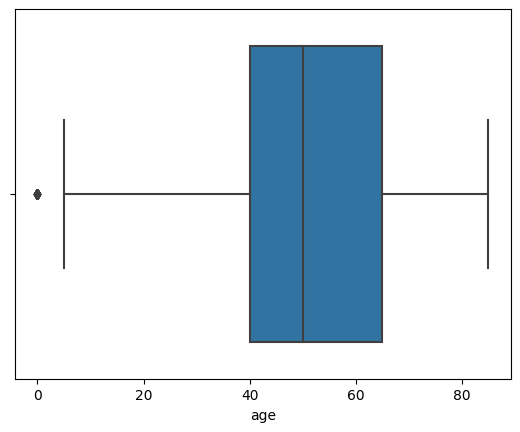

In [13]:
# melihat outliers age
sns.boxplot(x=dataframe_skin['age'])

In [14]:
# menangani outliers age
Q1 = dataframe_skin.quantile(0.25, numeric_only=True)
Q3 = dataframe_skin.quantile(0.75, numeric_only=True)
IQR=Q3-Q1
qcombine = dataframe_skin.lt(Q1-1.5*IQR) | dataframe_skin.gt(Q3+1.5*IQR)
datadexing = qcombine.any(axis=1)
dataframe_skinmel=dataframe_skin[~datadexing]


dataframe_skin.shape

(9958, 4)

#### Exploratory Data Analysis - Univariate Analysis
1. Memproses outliers untuk sex karena gender hanya ada(Male, Female) (Maaf kesetaraan gender & sex ini hanya pembelajaran!)
2. Memproses outliers untuk localization yang tidak diketahui

In [15]:
dataframe_skin

,dx,age,sex,localization
0,bkl,80.0,male,scalp
1,bkl,80.0,male,scalp
2,bkl,80.0,male,scalp
3,bkl,80.0,male,scalp
4,bkl,75.0,male,ear
...,...,...,...,...
10010,akiec,40.0,male,abdomen
10011,akiec,40.0,male,abdomen
10012,akiec,40.0,male,abdomen
10013,akiec,80.0,male,face


In [16]:
numerical_features = ['age']
categorical_features = ['dx', 'sex', 'localization']

       jumlah sampel  persentase
nv              6660        66.9
mel             1111        11.2
bkl             1089        10.9
bcc              514         5.2
akiec            327         3.3
vasc             142         1.4
df               115         1.2


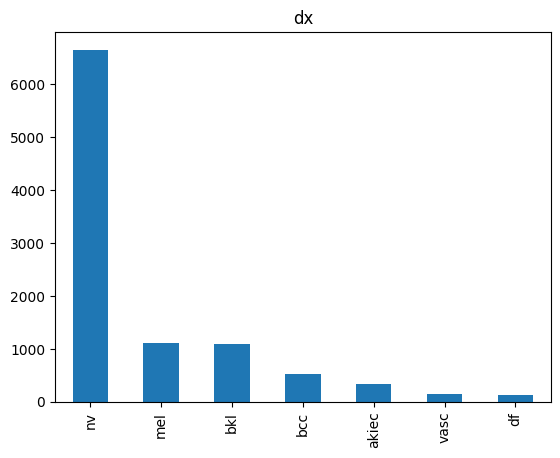

In [17]:
feature = categorical_features[0]
count = dataframe_skin[feature].value_counts()
percent = 100*dataframe_skin[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

         jumlah sampel  persentase
male              5400        54.2
female            4548        45.7
unknown             10         0.1


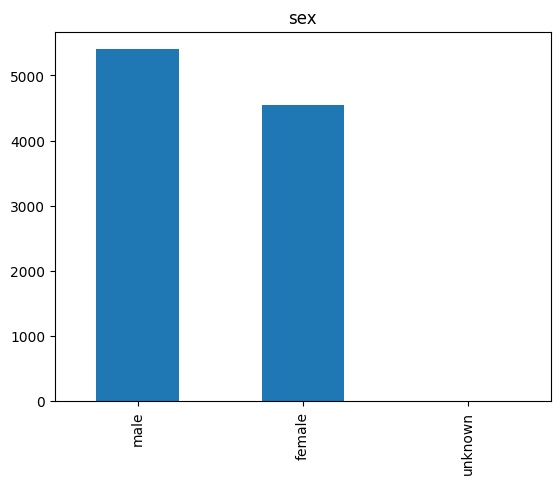

In [18]:
feature = categorical_features[1]
count = dataframe_skin[feature].value_counts()
percent = 100*dataframe_skin[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [19]:
# menangani outliers age
dataframe_skin = dataframe_skin.drop(dataframe_skin[dataframe_skin.sex == 'unknown'].index)

                 jumlah sampel  persentase
back                      2190        22.0
lower extremity           2077        20.9
trunk                     1400        14.1
upper extremity           1116        11.2
abdomen                   1019        10.2
face                       743         7.5
chest                      405         4.1
foot                       314         3.2
unknown                    187         1.9
neck                       168         1.7
scalp                      128         1.3
hand                        90         0.9
ear                         56         0.6
genital                     48         0.5
acral                        7         0.1


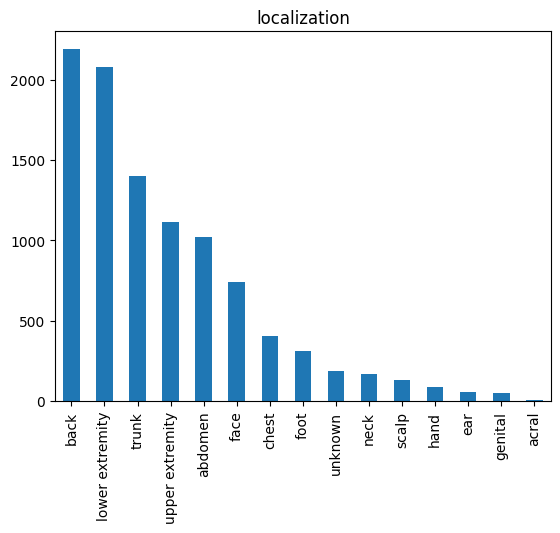

In [20]:
feature = categorical_features[2]
count = dataframe_skin[feature].value_counts()
percent = 100*dataframe_skin[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [21]:
# menangani outliers localization
dataframe_skin = dataframe_skin.drop(dataframe_skin[dataframe_skin.localization == 'unknown'].index)

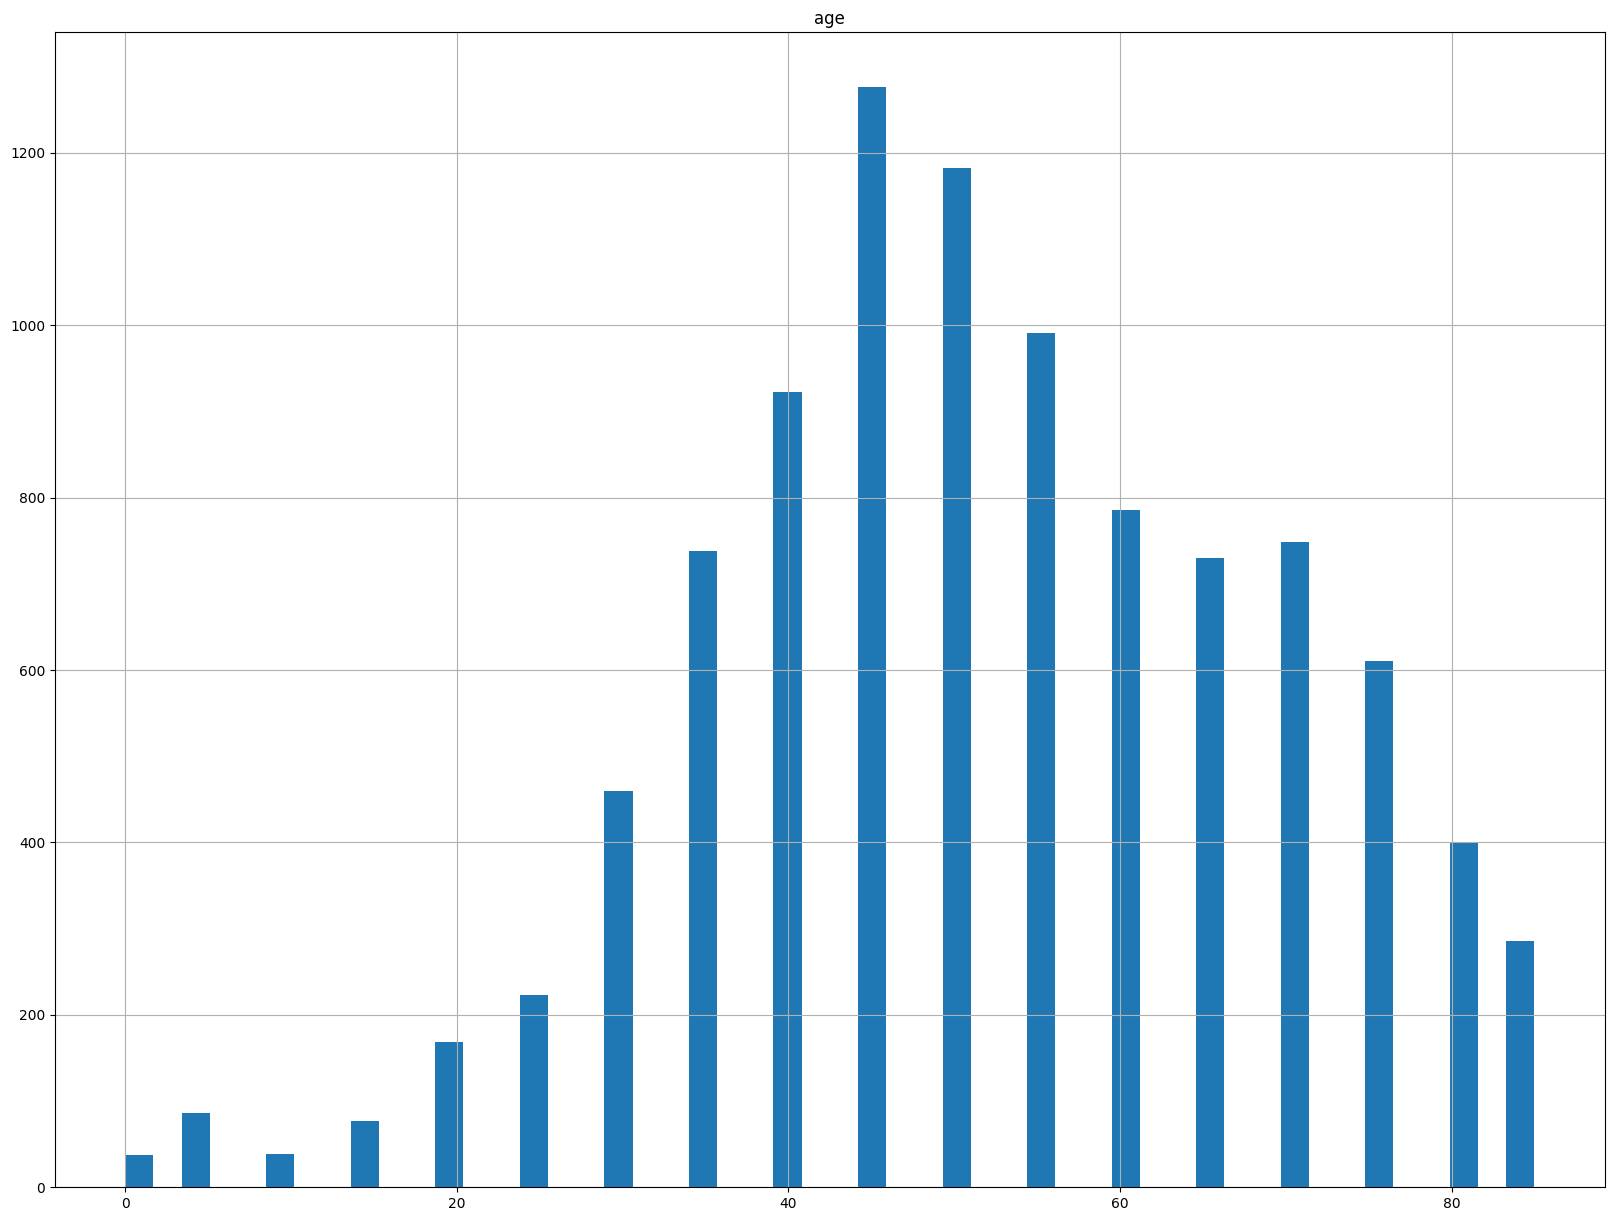

In [22]:
dataframe_skin.hist(bins=50, figsize=(20,15))
plt.show()

#### Exploratory Data Analysis - Multivariate Analysis

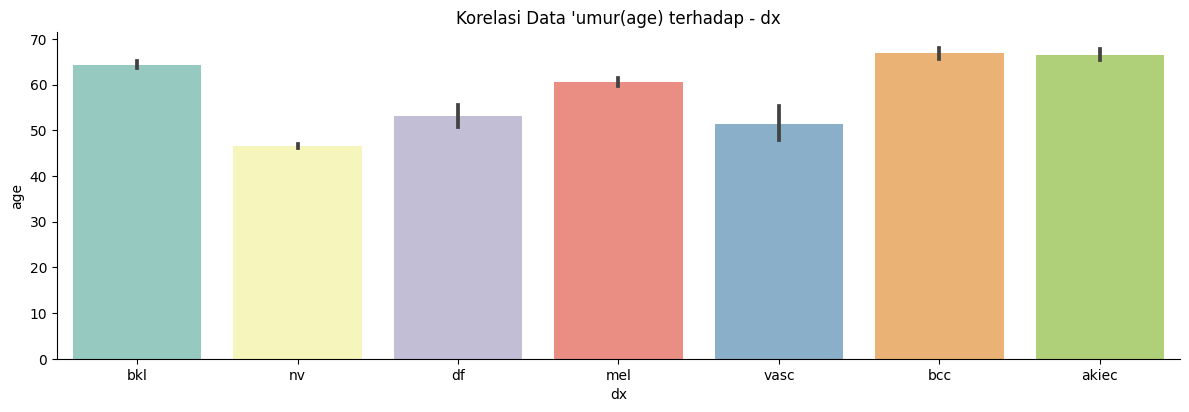

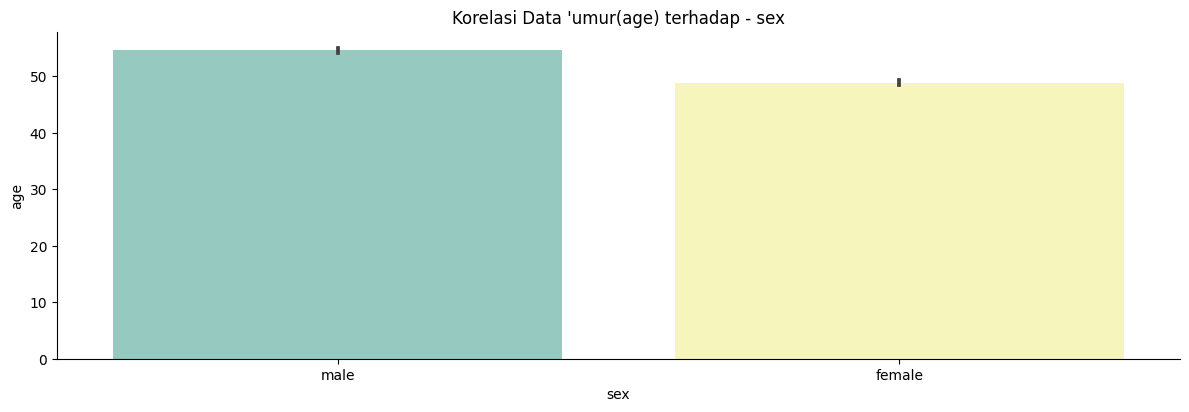

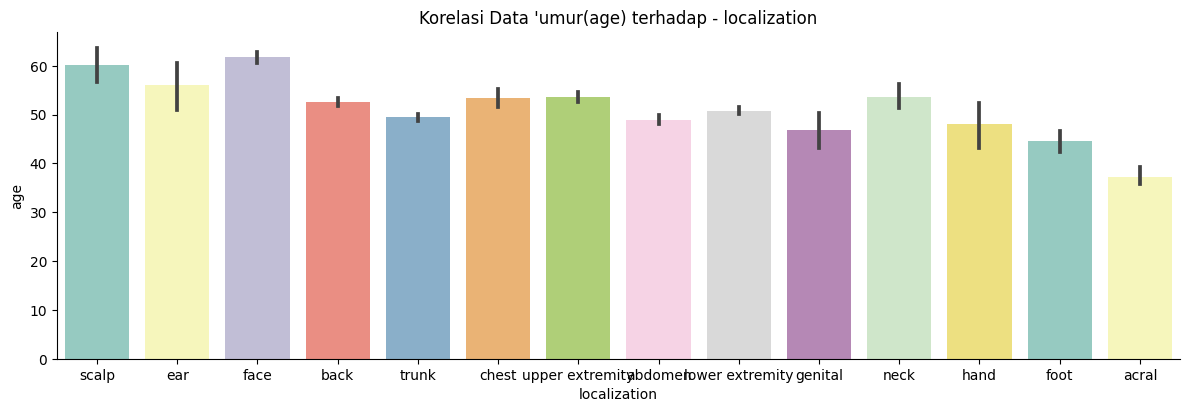

In [23]:
cat_features = dataframe_skin.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="age", kind="bar", dodge=False, height = 4, aspect = 3,  data=dataframe_skin, palette="Set3")
  plt.title("Korelasi Data 'umur(age) terhadap - {}".format(col))

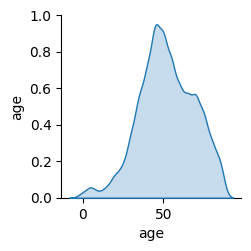

In [24]:
sns.pairplot(dataframe_skin, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

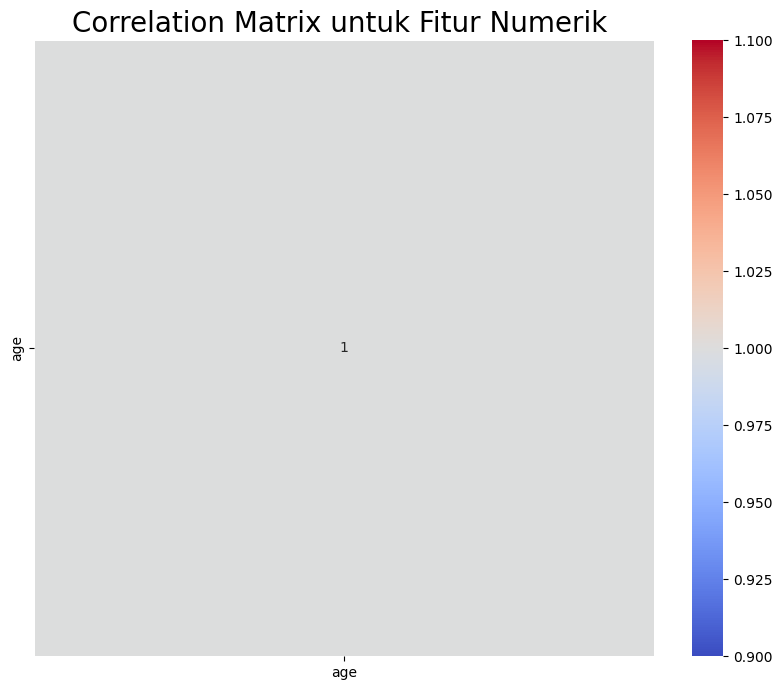

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe_skin.corr(numeric_only=True).round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation
Ini adalah tahapan yang dilakukan pada *Data Preparation* :
1. Encoding fitur kategori *OHE* (*One-Hot Encoding*) </br>
karena, Data kategorikal yang sebenarnya tidak
Beberapa dari data ini akan di-*Encode* dengan cara *OHE* untuk kolom : *sex* dan *localization*</br>
2. pembagian dataset dengan fungsi *train_test_split*</br>
Data *training* dan data *test* akan dibagi menjadi +/- 60 : 30 karena, mendapatkan hasil yang lumayan stabil dalam evaluasi model
Dalam pembagian dataset ini terbagi menjadi </br>
X adalah data yang bisa diprediksi berdasarkan *age, sex & localization* </br>
y adalah data target yang untuk diprediksi (dx)</br>

In [26]:
dataframe_skin_ohe = dataframe_skin


# OHE encode
dataframe_skin_ohe = pd.concat([dataframe_skin_ohe, pd.get_dummies(dataframe_skin_ohe['sex'], prefix='sex')],axis=1)
dataframe_skin_ohe = pd.concat([dataframe_skin_ohe, pd.get_dummies(dataframe_skin_ohe['localization'], prefix='localization')],axis=1)


# label encode
# label_encoder = LabelEncoder()
# dx_name = dataframe_skin_ohe['dx'].unique()
# dataframe_skin_ohe['dx']= label_encoder.fit_transform(dataframe_skin_ohe['dx'])
# dx_numberlabel = dataframe_skin_ohe['dx'].unique()
# dataframe_skin_ohedx = dataframe_skin_ohe['dx']

# throw unneeded
dataframe_skin_ohe.drop(['sex','localization'], axis=1, inplace=True)

# for i in range(len(dx_name) ) :
#   print(f'{dx_name[i]} : {dx_numberlabel[i]}' )

In [27]:
dataframe_skin_ohe

,dx,age,sex_female,sex_male,localization_abdomen,localization_acral,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_upper extremity
0,bkl,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,bkl,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,bkl,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,bkl,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,bkl,75.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,akiec,40.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10011,akiec,40.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10012,akiec,40.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10013,akiec,80.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


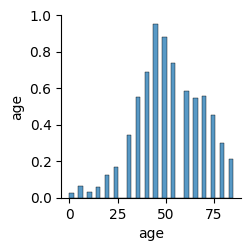

In [28]:
sns.pairplot(dataframe_skin_ohe[['age']], plot_kws={"s": 3});

In [29]:
dfman = dataframe_skin_ohe
X = dfman.drop(["dx"],axis =1)
y = dfman[["dx"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.37, random_state = 420)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 9761
Total # of sample in train dataset: 6149
Total # of sample in test dataset: 3612


## Modelling
Penggunaan model
1. *Linear SVC* (lsvc : clf)
2. *K Neighbors Classifier* (knc : knn)
3. *Random Forest Classifier* (randfc : clfr)
4. *Boosting Algorithm* (gradboostc : clfg)</br>

Karena ada 4 model tahapan 1 adalah tahapan paling buruk dan terakhir adalah tahapan terbaik tetapi, pada kenyataannya tidak selalu begitu. Random forest terpilih yang baik karena akurasinya. walaupun linear SVC adalah terburuk tetapi, akurasi tersebut bisa menyaingi beberapa model setingkatnya.

Model-model tesebut memiliki data default dan masih belum *tuning* hyperparameter, karena masih tahapan belajar dan model-model tersebut memiliki akurasi yang bagus.

Terlihat model linearSVC hampir sesuai dengan akurasinya dan model yang paling mendekati akurasinya.

Sewaktu pertama kali melihat tentang prediksi akurasi pertama kali, praduga awal yang terbaik adalah model random forest classifier karena, memang hasil akurasinya tertinggi. Setelah di-evaluasi pada beberapa sampel bisa diketahui bahwa Gradient boosting classifier adalah hasil yang terbaik walaupun dia bukan mendapat akurasi yang terbaik tetapi hasil koreksi sangat mendekati dengan data yang diuji!

In [30]:
models = pd.DataFrame(index=['train_acc', 'test_acc'],
                      columns=['lsvc', 'knc', 'randfc','gradboostc'])

In [31]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

models.loc['test_acc','lsvc'] = clf.score(X_test, y_test)
models.loc['train_acc','lsvc'] = clf.score(X_train, y_train)
clf.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6699889258028793

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

models.loc['test_acc','knc'] = knn.score(X_test, y_test)
models.loc['train_acc','knc'] = knn.score(X_train, y_train)
knn.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6384274640088593

In [33]:
clfr = RandomForestClassifier()
clfr = clfr.fit(X_train, y_train)

models.loc['test_acc','randfc'] = clfr.score(X_test, y_test)
models.loc['train_acc','randfc'] = clfr.score(X_train, y_train)
clfr.score(X_test, y_test)

<ipython-input-33-9a6b4e7c4c70>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clfr = clfr.fit(X_train, y_train)


0.6924141749723145

In [34]:
clfg = GradientBoostingClassifier()
clfg = clfg.fit(X_train, y_train)

models.loc['test_acc','gradboostc'] = clfg.score(X_test, y_test)
models.loc['train_acc','gradboostc'] = clfg.score(X_train, y_train)
clfg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6943521594684385

In [35]:
# mengetest hasil model
times = 175
dlsvc = []; dknc = []; drandfc = []; dgradboostfc = [];
print('-Linear SVC-')
for i in range(times):
  a = clf.predict([X_test.iloc[i] ])
  dlsvc.append(a[0])
  print(a);

print('-K Neighbors Classifier-')
for i in range(times):
  a = knn.predict([X_test.iloc[i] ])
  dknc.append(a[0])
  print(a);

print('-Random Forest Classifier-')
for i in range(times):
  a = clfr.predict([X_test.iloc[i] ])
  drandfc.append(a[0])
  print(a);

print('-Boosting Algorithm-')
for i in range(times):
  a = clfg.predict([X_test.iloc[i] ])
  dgradboostfc.append(a[0])
  print(a);


-Linear SVC-
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with

['nv']
['nv']
['nv']
['bkl']
['nv']
['bkl']
['nv']
['nv']
['bkl']
['bcc']
['bkl']
['nv']
['nv']
['mel']
['nv']
['mel']
['nv']
['akiec']
['mel']
['akiec']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bcc']
['bkl']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['df']
['akiec']
['bcc']
['bkl']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['bkl']
['nv']
['nv']
['bkl']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['mel']
['nv']
['akiec']
['nv']
['bkl']
['nv']
['nv']
['bkl']
['bkl']
['nv']
['nv']
['akiec']
['bkl']
['nv']
['bcc']
['mel']
['nv']
['nv']
['akiec']
['bkl']
['bkl']
['df']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['mel']
['nv']
['df']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['bkl']
['bkl']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['akiec']
['nv']
['akiec']
['mel']
['nv']
['mel']
['df']
['df']
['nv']
['nv']
['bkl']
['mel']
['nv']
['nv']
['nv']
['nv']
['mel']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

['mel']
['nv']
['nv']
['mel']
['mel']
['bkl']
['nv']
['df']
['nv']
['bkl']
['nv']
['nv']
['mel']
['bkl']
['nv']
['nv']
['bkl']
['bkl']
['nv']
['nv']
['nv']
['nv']
['bkl']
-Random Forest Classifier-
['nv']
['nv']
['nv']
['bkl']
['nv']
['mel']
['nv']
['nv']
['mel']
['bcc']
['mel']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['mel']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['akiec']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['mel']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['akiec']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

['bkl']
['nv']
['bkl']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
-Boosting Algorithm-
['nv']
['nv']
['nv']
['bkl']
['nv']
['mel']
['nv']
['nv']
['bkl']
['bcc']
['bkl']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['mel']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['mel']
['nv']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['nv']
['bkl']
['nv']
['nv']
['nv']
['bkl']
['bkl']
['nv']
['bkl']
['mel']
['nv']
['nv']
['nv']
['nv']
['nv']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py

## Evaluation
Model metrik dievaluasi berdasarkan *accuracy-score*</br>
Berdasarkan dari [Scikit-Page tentang *accuracy-score*](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)</br>
![image](https://drive.google.com/uc?id=1ajEbi3ij9jODClFa2325e7CIswpGGD55&export=download)</br>

Fungsi *Accuracy-score* menghitung akurasi, dari beberapa deret atau menghitung nilai prediksi yang benar.</br>
Pada pengkelasan *multilabel*, fungsi tersebut mengembalikan nilai dari sebagian deret nilai akurasi. Bila semua data diprediksi pada label untuk sampel yang cocok dengan deret nilai, maka akurasi tersebut bernilai 1; yang lain adalah 0</br>

![image](https://drive.google.com/uc?id=1oq-2nH9TIIYIxitFGSKXAaT7xeNoHQWy&export=download)</br></br>
Terlihat model *Gradient Boost Classifier* adalah model yang mempunyai *accuracy-score* yang bagus. </br>
Ternyata sewaktu dievaluasi Algoritma *Gradient Boost Classifier* adalah hasil yang paling mempunyai penilaian akurasi besar walaupun, algoritma *Random Forest Classifier* adalah akurasi model yang terbesar.

In [36]:
models

,lsvc,knc,randfc,gradboostc
train_acc,0.67637,0.662384,0.723207,0.712636
test_acc,0.669989,0.638427,0.692414,0.694352


In [37]:
dfacc = models.T
dfacc

,train_acc,test_acc
lsvc,0.67637,0.669989
knc,0.662384,0.638427
randfc,0.723207,0.692414
gradboostc,0.712636,0.694352


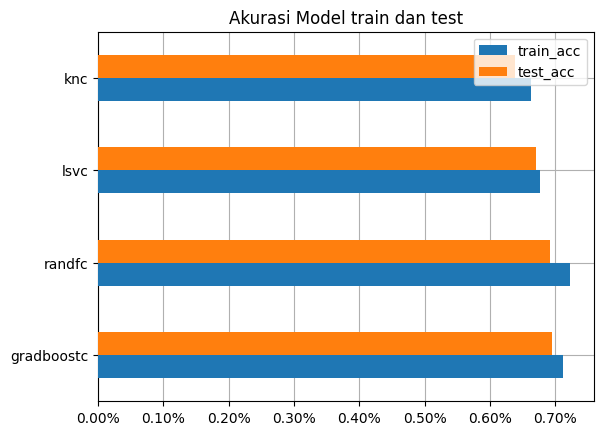

In [43]:
fig, ax = plt.subplots()
dfacc.sort_values(by='test_acc', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.set_title('Akurasi Model train dan test')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(zorder=0)

In [39]:
as_dlsvc = accuracy_score(y_test[:times], dlsvc); print("LinearSVC : ",  as_dlsvc)
as_dknc = accuracy_score(y_test[:times], dknc); print("K Neighbors Classifier : ", as_dknc )
as_drandfc = accuracy_score(y_test[:times], drandfc); print("Random Forest Classifier : ", as_drandfc )
as_dgradboostfc = accuracy_score(y_test[:times], dgradboostfc); print("Gradient Boost Classifier : ", as_dgradboostfc )

LinearSVC :  0.6342857142857142
K Neighbors Classifier :  0.6
Random Forest Classifier :  0.6514285714285715
Gradient Boost Classifier :  0.6742857142857143


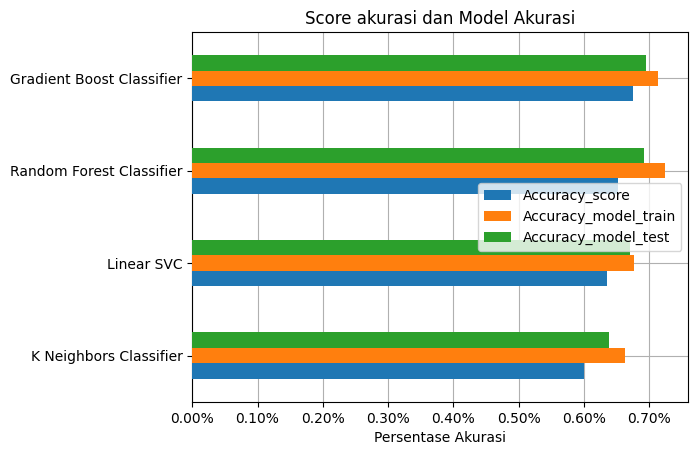

In [48]:
accdata = {
    'Accuracy_score' : [as_dlsvc, as_dknc, as_drandfc, as_dgradboostfc],
    'Accuracy_model_train' : [dfacc['train_acc']['lsvc'], dfacc['train_acc']['knc'], dfacc['train_acc']['randfc'], dfacc['train_acc']['gradboostc'] ],
    'Accuracy_model_test' : [dfacc['test_acc']['lsvc'], dfacc['test_acc']['knc'], dfacc['test_acc']['randfc'], dfacc['test_acc']['gradboostc'] ],
}
accdf = pd.DataFrame(accdata, index=['Linear SVC', 'K Neighbors Classifier', 'Random Forest Classifier', 'Gradient Boost Classifier'])

fig, ax = plt.subplots()
accdf.sort_values(by='Accuracy_score', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.set_title('Score akurasi dan Model Akurasi')
ax.set_xlabel('Persentase Akurasi')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(zorder=0)